In [7]:
%pip install numpy
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [8]:
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

In [22]:
weight_to_int = {"1.50":0, "2.00":1, '3.00':2, '4.00':3, '5.00':4, '6.00':5, '7.00':6, '8.00':7, '9.00':8, '10.00':9}
int_to_alg = {0:'WA*', 1:'pwXD', 2:'pwXU', 3:'XDP', 4:'XUP', 5:'DSMAP', 6:'MAP', 7:'new', 8:'new2'}

### The following Code Creates Box Plots.
#### one plot for each weight, each containing #policies boxes.

In [24]:
##Experiment 5: Created the box plots. Each plot, y-axis:work and x-axis:algs, for one weight.
numPolicies = 7
fileName = 'random40v4'
Weights = {"1.50":[], "2.00":[], '3.00':[], '4.00':[], '5.00':[], '6.00':[], '7.00':[], '8.00':[], '9.00':[], '10.00':[]}
for w in Weights.values():
    for i in range(numPolicies):
        a = []
        w.append(a)

cnt = 0
with open("./results/"+fileName+"-results.txt", "r") as f:
    numLines = len(f.readlines())
with open("./results/"+fileName+"-results.txt", "r") as f:
    for line in f:
        data = line.split()
        if(len(data)): ## To check for empy lines
            if data[0] == "MAP" : #and data[5]!='0' and data[5]!='1' and data[5]!='6' and data[5]!='8':# and data[9]!='0':
                np.append(Weights[data[7]][int(data[5])],(int(data[9])))
                Weights[data[7]][int(data[5])].append(int(data[9]))
        cnt += 1
        if cnt/numLines*100 % 5 == 0:
            print(cnt/numLines*100, '%')
print("Done Reading the Data..")

10.0 %
20.0 %
30.0 %


KeyboardInterrupt: 

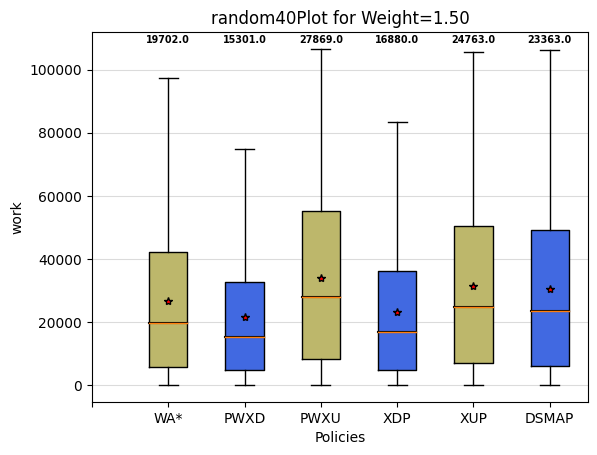

Box information:
 Policy WA*
 median 19702.0
 upper_quartile 42251.0
 lower_quartile 5603.0
 upper_whisker 97223
 lower_whisker 32

 Policy PWXD
 median 15301.0
 upper_quartile 32735.0
 lower_quartile 4667.5
 upper_whisker 74804
 lower_whisker 36

 Policy PWXU
 median 27869.0
 upper_quartile 55199.5
 lower_quartile 8219.0
 upper_whisker 106576
 lower_whisker 31

 Policy XDP
 median 16880.0
 upper_quartile 36304.5
 lower_quartile 4921.0
 upper_whisker 83344
 lower_whisker 34

 Policy XUP
 median 24763.0
 upper_quartile 50332.5
 lower_quartile 7123.5
 upper_whisker 105658
 lower_whisker 31

 Policy DSMAP
 median 23363.0
 upper_quartile 49235.0
 lower_quartile 6156.0
 upper_whisker 106248
 lower_whisker 34



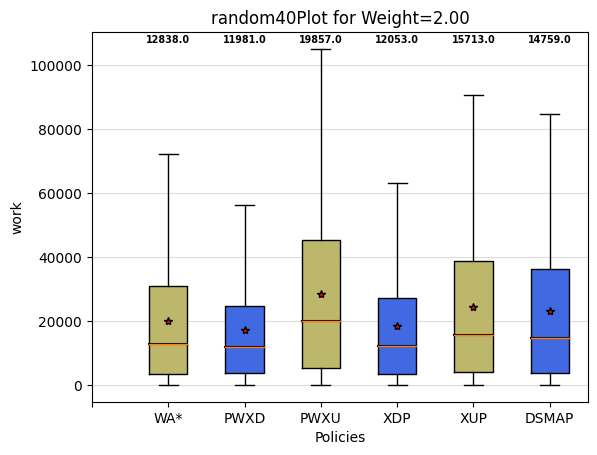

Box information:
 Policy WA*
 median 12838.0
 upper_quartile 30938.5
 lower_quartile 3444.0
 upper_whisker 72178
 lower_whisker 31

 Policy PWXD
 median 11981.0
 upper_quartile 24829.5
 lower_quartile 3869.0
 upper_whisker 56254
 lower_whisker 37

 Policy PWXU
 median 19857.0
 upper_quartile 45140.5
 lower_quartile 5183.0
 upper_whisker 104966
 lower_whisker 31

 Policy XDP
 median 12053.0
 upper_quartile 27260.0
 lower_quartile 3437.0
 upper_whisker 62986
 lower_whisker 32

 Policy XUP
 median 15713.0
 upper_quartile 38635.5
 lower_quartile 3938.5
 upper_whisker 90673
 lower_whisker 31

 Policy DSMAP
 median 14759.0
 upper_quartile 36168.5
 lower_quartile 3888.0
 upper_whisker 84583
 lower_whisker 32



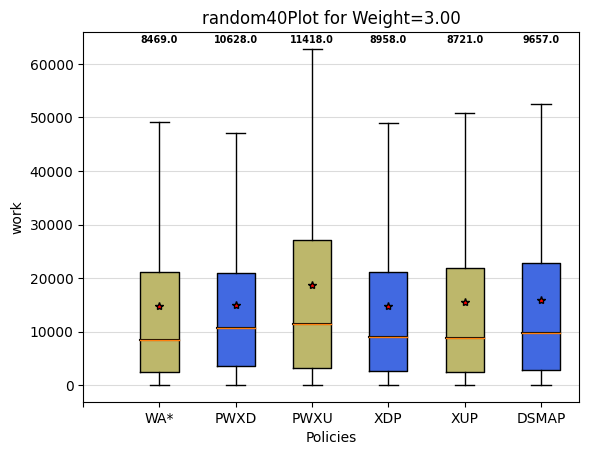

Box information:
 Policy WA*
 median 8469.0
 upper_quartile 21144.5
 lower_quartile 2473.0
 upper_whisker 49131
 lower_whisker 31

 Policy PWXD
 median 10628.0
 upper_quartile 20960.5
 lower_quartile 3532.0
 upper_whisker 47101
 lower_whisker 36

 Policy PWXU
 median 11418.0
 upper_quartile 27038.5
 lower_quartile 3180.0
 upper_whisker 62804
 lower_whisker 31

 Policy XDP
 median 8958.0
 upper_quartile 21165.0
 lower_quartile 2668.5
 upper_whisker 48877
 lower_whisker 31

 Policy XUP
 median 8721.0
 upper_quartile 21810.5
 lower_quartile 2504.5
 upper_whisker 50769
 lower_whisker 31

 Policy DSMAP
 median 9657.0
 upper_quartile 22756.0
 lower_quartile 2904.0
 upper_whisker 52520
 lower_whisker 32



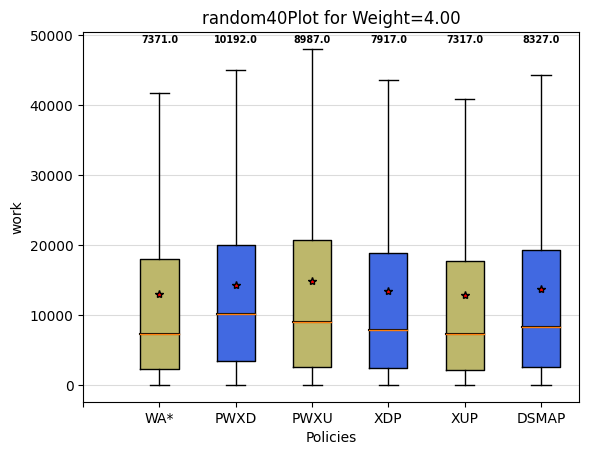

Box information:
 Policy WA*
 median 7371.0
 upper_quartile 18052.0
 lower_quartile 2246.0
 upper_whisker 41751
 lower_whisker 31

 Policy PWXD
 median 10192.0
 upper_quartile 20047.0
 lower_quartile 3428.0
 upper_whisker 44960
 lower_whisker 36

 Policy PWXU
 median 8987.0
 upper_quartile 20787.5
 lower_quartile 2630.0
 upper_whisker 48017
 lower_whisker 31

 Policy XDP
 median 7917.0
 upper_quartile 18877.5
 lower_quartile 2436.5
 upper_whisker 43513
 lower_whisker 31

 Policy XUP
 median 7317.0
 upper_quartile 17694.0
 lower_quartile 2212.0
 upper_whisker 40899
 lower_whisker 31

 Policy DSMAP
 median 8327.0
 upper_quartile 19280.0
 lower_quartile 2629.5
 upper_whisker 44254
 lower_whisker 32



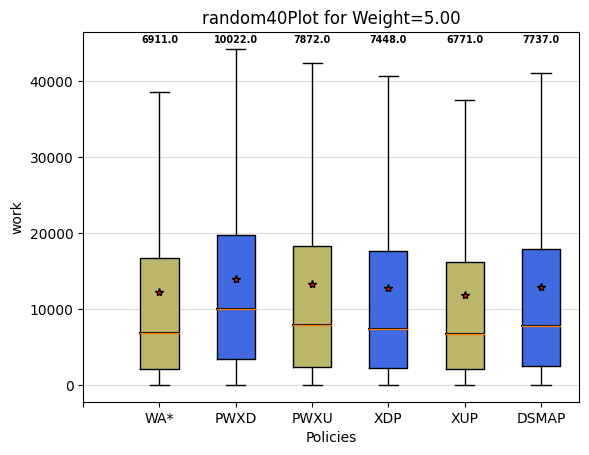

Box information:
 Policy WA*
 median 6911.0
 upper_quartile 16723.0
 lower_quartile 2154.5
 upper_whisker 38537
 lower_whisker 31

 Policy PWXD
 median 10022.0
 upper_quartile 19716.5
 lower_quartile 3383.0
 upper_whisker 44210
 lower_whisker 36

 Policy PWXU
 median 7872.0
 upper_quartile 18352.5
 lower_quartile 2379.0
 upper_whisker 42311
 lower_whisker 31

 Policy XDP
 median 7448.0
 upper_quartile 17634.5
 lower_quartile 2312.5
 upper_whisker 40616
 lower_whisker 31

 Policy XUP
 median 6771.0
 upper_quartile 16240.0
 lower_quartile 2102.0
 upper_whisker 37444
 lower_whisker 31

 Policy DSMAP
 median 7737.0
 upper_quartile 17918.0
 lower_quartile 2510.0
 upper_whisker 41026
 lower_whisker 31



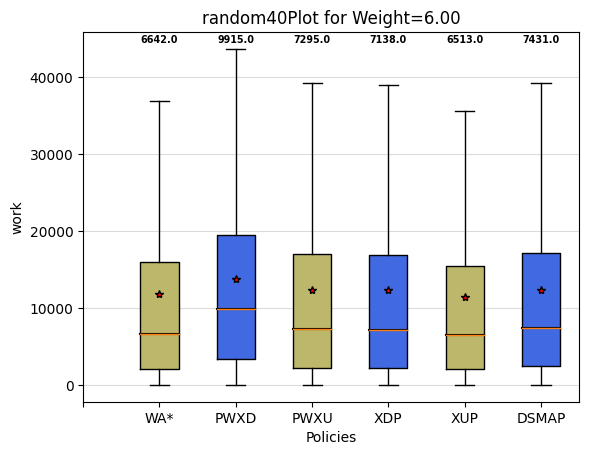

Box information:
 Policy WA*
 median 6642.0
 upper_quartile 16023.5
 lower_quartile 2096.5
 upper_whisker 36912
 lower_whisker 31

 Policy PWXD
 median 9915.0
 upper_quartile 19476.5
 lower_quartile 3359.5
 upper_whisker 43647
 lower_whisker 36

 Policy PWXU
 median 7295.0
 upper_quartile 17057.0
 lower_quartile 2245.5
 upper_whisker 39268
 lower_whisker 31

 Policy XDP
 median 7138.0
 upper_quartile 16943.0
 lower_quartile 2242.0
 upper_whisker 38993
 lower_whisker 31

 Policy XUP
 median 6513.0
 upper_quartile 15456.0
 lower_quartile 2045.0
 upper_whisker 35565
 lower_whisker 31

 Policy DSMAP
 median 7431.0
 upper_quartile 17142.0
 lower_quartile 2434.5
 upper_whisker 39180
 lower_whisker 31



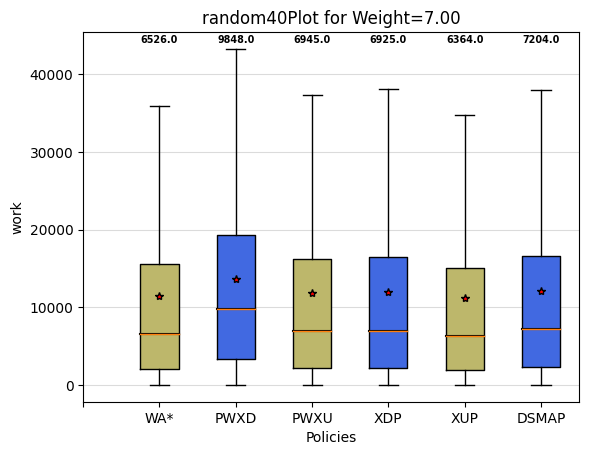

Box information:
 Policy WA*
 median 6526.0
 upper_quartile 15585.5
 lower_quartile 2060.0
 upper_whisker 35867
 lower_whisker 31

 Policy PWXD
 median 9848.0
 upper_quartile 19296.0
 lower_quartile 3340.5
 upper_whisker 43227
 lower_whisker 36

 Policy PWXU
 median 6945.0
 upper_quartile 16219.5
 lower_quartile 2161.0
 upper_whisker 37307
 lower_whisker 31

 Policy XDP
 median 6925.0
 upper_quartile 16530.5
 lower_quartile 2198.0
 upper_whisker 38025
 lower_whisker 31

 Policy XUP
 median 6364.0
 upper_quartile 15125.0
 lower_quartile 2010.0
 upper_whisker 34794
 lower_whisker 31

 Policy DSMAP
 median 7204.0
 upper_quartile 16595.5
 lower_quartile 2370.0
 upper_whisker 37933
 lower_whisker 31



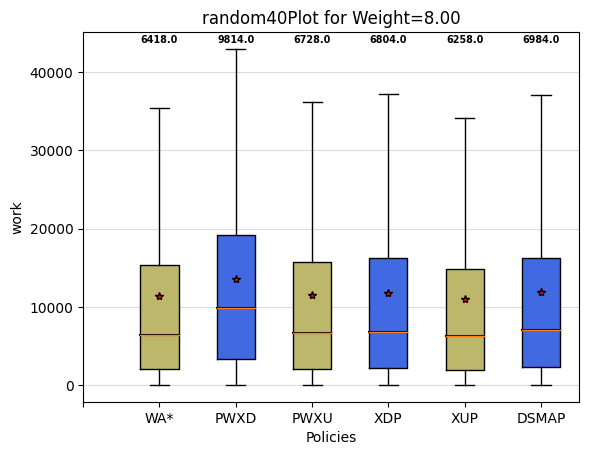

Box information:
 Policy WA*
 median 6418.0
 upper_quartile 15366.0
 lower_quartile 2031.0
 upper_whisker 35367
 lower_whisker 31

 Policy PWXD
 median 9814.0
 upper_quartile 19184.5
 lower_quartile 3331.5
 upper_whisker 42957
 lower_whisker 36

 Policy PWXU
 median 6728.0
 upper_quartile 15742.5
 lower_quartile 2107.0
 upper_whisker 36190
 lower_whisker 31

 Policy XDP
 median 6804.0
 upper_quartile 16202.0
 lower_quartile 2163.0
 upper_whisker 37259
 lower_whisker 31

 Policy XUP
 median 6258.0
 upper_quartile 14839.0
 lower_quartile 1995.0
 upper_whisker 34100
 lower_whisker 31

 Policy DSMAP
 median 6984.0
 upper_quartile 16207.0
 lower_quartile 2299.0
 upper_whisker 37067
 lower_whisker 31



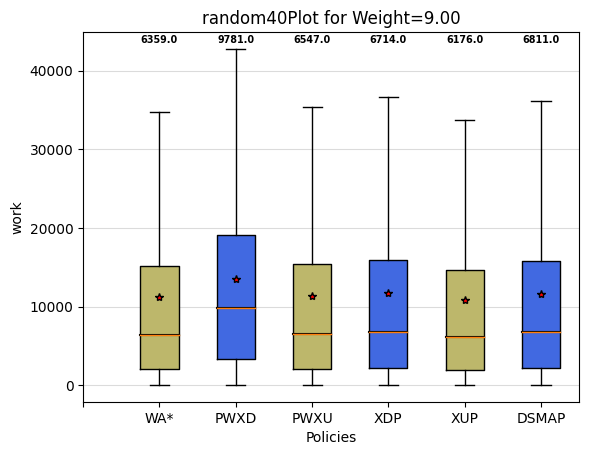

Box information:
 Policy WA*
 median 6359.0
 upper_quartile 15136.0
 lower_quartile 2013.5
 upper_whisker 34793
 lower_whisker 31

 Policy PWXD
 median 9781.0
 upper_quartile 19111.0
 lower_quartile 3319.5
 upper_whisker 42775
 lower_whisker 36

 Policy PWXU
 median 6547.0
 upper_quartile 15418.5
 lower_quartile 2076.5
 upper_whisker 35431
 lower_whisker 31

 Policy XDP
 median 6714.0
 upper_quartile 15972.0
 lower_quartile 2138.0
 upper_whisker 36716
 lower_whisker 31

 Policy XUP
 median 6176.0
 upper_quartile 14698.0
 lower_quartile 1982.0
 upper_whisker 33772
 lower_whisker 31

 Policy DSMAP
 median 6811.0
 upper_quartile 15817.5
 lower_quartile 2224.0
 upper_whisker 36207
 lower_whisker 31



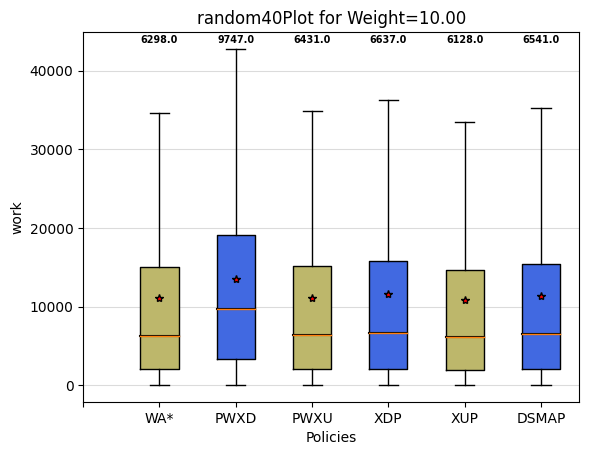

Box information:
 Policy WA*
 median 6298.0
 upper_quartile 15053.5
 lower_quartile 2005.0
 upper_whisker 34625
 lower_whisker 31

 Policy PWXD
 median 9747.0
 upper_quartile 19090.5
 lower_quartile 3311.0
 upper_whisker 42756
 lower_whisker 36

 Policy PWXU
 median 6431.0
 upper_quartile 15183.0
 lower_quartile 2049.0
 upper_whisker 34875
 lower_whisker 31

 Policy XDP
 median 6637.0
 upper_quartile 15782.0
 lower_quartile 2117.0
 upper_whisker 36279
 lower_whisker 31

 Policy XUP
 median 6128.0
 upper_quartile 14581.0
 lower_quartile 1977.0
 upper_whisker 33478
 lower_whisker 31

 Policy DSMAP
 median 6541.0
 upper_quartile 15382.0
 lower_quartile 2116.5
 upper_whisker 35278
 lower_whisker 31



In [17]:
for w in range(len(Weights.values())):
    data = []
    for alg in list(Weights.values())[w]:
        data.append(np.array(alg))

    fig, ax = plt.subplots()

    bp = ax.boxplot(data, showfliers=False, notch=False, sym='+', vert=True, whis=1.5)
    plt.setp(bp['boxes'], color='black')
    plt.setp(bp['whiskers'], color='black')
    plt.setp(bp['fliers'], color='red', marker='+')
    ax.yaxis.grid(True, linestyle='-', which='major', color='lightgrey', alpha=0.8)
    ax.set(
        axisbelow=True,  # Hide the grid behind plot objects
        title=fileName + 'Plot for Weight=' + list(Weights.keys())[w],
        xlabel='Policies',
        ylabel='work',
    )

    box_colors = ['darkkhaki', 'royalblue']
    num_boxes = len(data)
    medians = np.empty(num_boxes)
    for i in range(num_boxes):
        box = bp['boxes'][i]
        box_x = []
        box_y = []
        for j in range(5):
            box_x.append(box.get_xdata()[j])
            box_y.append(box.get_ydata()[j])
        box_coords = np.column_stack([box_x, box_y])
        # Alternate between Dark Khaki and Royal Blue
        ax.add_patch(Polygon(box_coords, facecolor=box_colors[i % 2]))
        # Now draw the median lines back over what we just filled in
        med = bp['medians'][i]
        median_x = []
        median_y = []
        for j in range(2):
            median_x.append(med.get_xdata()[j])
            median_y.append(med.get_ydata()[j])
            ax.plot(median_x, median_y, 'k')
        medians[i] = median_y[0]
        # Finally, overplot the sample averages, with horizontal alignment
        # in the center of each box
        ax.plot(np.average(med.get_xdata()), np.average(data[i]),
                color='r', marker='*', markeredgecolor='k')
        
    # Due to the Y-axis scale being different across samples, it can be
    # hard to compare differences in medians across the samples. Add upper
    # X-axis tick labels with the sample medians to aid in comparison
    # (just use two decimal places of precision)
    pos = np.arange(num_boxes) + 1
    upper_labels = [str(round(s, 2)) for s in medians]
    thickness = ['bold', 'semibold']
    for tick, label in zip(range(num_boxes), ax.get_xticklabels()):

        ax.text(pos[tick], .97, upper_labels[tick],
                transform=ax.get_xaxis_transform(), weight=thickness[1],
                horizontalalignment='center', size='x-small')

    y_pos = np.arange(len(int_to_alg.values())+1)
    labels = ['']
    labels += list(int_to_alg.values())
    plt.xticks(y_pos, labels)

    plt.show()
    print('Box information:')
    for alg in range(len(data)):
        median = np.median(data[alg])
        upper_quartile = np.percentile(data[alg], 75)
        lower_quartile = np.percentile(data[alg], 25)

        iqr = upper_quartile - lower_quartile
        upper_whisker = data[alg][data[alg]<=upper_quartile+1.5*iqr].max()
        lower_whisker = data[alg][data[alg]>=lower_quartile-1.5*iqr].min()

        print(' Policy '+int_to_alg[alg])
        print(' median', median)
        print(' upper_quartile', upper_quartile)
        print(' lower_quartile', lower_quartile)
        print(' upper_whisker', upper_whisker)
        print(' lower_whisker', lower_whisker)
        print()
    print('====================================')